In [8]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

# Read the CSV file
df = pd.read_csv('patient.csv')

# Assuming 'AdmissionStatus' is the target variable
target_variable = 'Triage Category'

# Perform label encoding for the target variable
le = LabelEncoder()
df[target_variable] = le.fit_transform(df[target_variable])

# Check if 'Gender' is present in the columns
if 'Gender' in df.columns:
    # Extract categorical features and one-hot encode them
    categorical_features = ['Gender']
    df = pd.get_dummies(df, columns=categorical_features, drop_first=True)
else:
    print("Column 'Gender' not found in the dataset.")

# Define Features and Target
features = ['Age', 'Gender_Male']  # Add other relevant features
X = df[features]
y = df[target_variable]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Decision Tree Classifier
classifier = DecisionTreeClassifier(random_state=42)

# Train the classifier
classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Display the results
print(f"Accuracy: {accuracy}")
print(f"Confusion Matrix:\n{conf_matrix}")
print(f"Classification Report:\n{classification_rep}")





Accuracy: 0.35
Confusion Matrix:
[[ 3  4  1]
 [ 1 10  1]
 [ 2 17  1]]
Classification Report:
              precision    recall  f1-score   support

           0       0.50      0.38      0.43         8
           1       0.32      0.83      0.47        12
           2       0.33      0.05      0.09        20

    accuracy                           0.35        40
   macro avg       0.39      0.42      0.33        40
weighted avg       0.36      0.35      0.27        40



In [9]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

# Assuming you have X (features) and y (target variable) from your preprocessed dataset
# Make sure to split your data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define a list of classifiers to evaluate
classifiers = [
    ('Logistic Regression', LogisticRegression()),
    ('Decision Tree', DecisionTreeClassifier()),
    ('Random Forest', RandomForestClassifier()),
    ('Support Vector Machine', SVC())
]

# Function to train and evaluate each classifier
def train_and_evaluate_classifier(classifier, X_train, y_train, X_test, y_test):
    classifier_name, clf = classifier
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred)
    
    print(f"{classifier_name} Classifier:")
    print(f"Accuracy: {accuracy:.2f}")
    print("Classification Report:")
    print(report)
    print("="*50)

# Train and evaluate each classifier
for classifier in classifiers:
    train_and_evaluate_classifier(classifier, X_train, y_train, X_test, y_test)



Logistic Regression Classifier:
Accuracy: 0.35
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         8
           1       0.28      0.75      0.41        12
           2       0.62      0.25      0.36        20

    accuracy                           0.35        40
   macro avg       0.30      0.33      0.26        40
weighted avg       0.40      0.35      0.30        40

Decision Tree Classifier:
Accuracy: 0.35
Classification Report:
              precision    recall  f1-score   support

           0       0.50      0.38      0.43         8
           1       0.32      0.83      0.47        12
           2       0.33      0.05      0.09        20

    accuracy                           0.35        40
   macro avg       0.39      0.42      0.33        40
weighted avg       0.36      0.35      0.27        40

Random Forest Classifier:
Accuracy: 0.30
Classification Report:
              precision    recall  f1-sc

C:\Users\shikhar\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\shikhar\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\shikhar\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\shikhar\anaconda3\lib\site-packages\skle

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create an instance of the model (replace RandomForestClassifier with your chosen classifier)
model = RandomForestClassifier()

# Train the model on the training set
model.fit(X_train, y_train)

# Optionally, you can evaluate the model on the testing set
y_pred = model.predict(X_test)

# Print evaluation metrics (replace with your specific metrics)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# If needed, perform cross-validation to get a more robust evaluation
cv_scores = cross_val_score(model, X, y, cv=5)  # 5-fold cross-validation
print(f"Cross-validation scores: {cv_scores}")
print(f"Mean Cross-validation accuracy: {cv_scores.mean():.2f}")


Accuracy: 0.42
Cross-validation scores: [0.475 0.425 0.425 0.375 0.525]
Mean Cross-validation accuracy: 0.45


In [11]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

# Assuming you have trained your model (replace 'model' with your actual model)
# model = ...

# Predict on the testing set
y_pred = model.predict(X_test)

# Evaluate the model using different metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Classification Report
class_report = classification_report(y_test, y_pred)

# Print the metrics
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")

# Display Confusion Matrix
print("Confusion Matrix:")
print(conf_matrix)

# Display Classification Report
print("Classification Report:")
print(class_report)


Accuracy: 0.42
Precision: 0.54
Recall: 0.42
F1 Score: 0.40
Confusion Matrix:
[[ 2  5  1]
 [ 1 10  1]
 [ 2 13  5]]
Classification Report:
              precision    recall  f1-score   support

           0       0.40      0.25      0.31         8
           1       0.36      0.83      0.50        12
           2       0.71      0.25      0.37        20

    accuracy                           0.42        40
   macro avg       0.49      0.44      0.39        40
weighted avg       0.54      0.42      0.40        40



In [12]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid to search
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create a Random Forest Classifier
random_forest = RandomForestClassifier(random_state=42)

# Create GridSearchCV object
grid_search = GridSearchCV(random_forest, param_grid, cv=5, scoring='accuracy')

# Fit the model with the best hyperparameters
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:")
print(best_params)

# Get the best model
best_model = grid_search.best_estimator_

# Evaluate the best model
y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
confusion_mat = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f"Accuracy with Best Model: {accuracy:.2%}")
print("Confusion Matrix:")
print(confusion_mat)
print("Classification Report:")
print(classification_rep)


Best Hyperparameters:
{'max_depth': None, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 50}
Accuracy with Best Model: 37.50%
Confusion Matrix:
[[ 0  7  1]
 [ 0 10  2]
 [ 0 15  5]]
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         8
           1       0.31      0.83      0.45        12
           2       0.62      0.25      0.36        20

    accuracy                           0.38        40
   macro avg       0.31      0.36      0.27        40
weighted avg       0.41      0.38      0.31        40



C:\Users\shikhar\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\shikhar\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\shikhar\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [13]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

# Assuming you have X (features) and y (target variable) from your preprocessed dataset
# Make sure to split your data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define a list of classifiers to evaluate
classifiers = [
    ('Logistic Regression', LogisticRegression()),
    ('Decision Tree', DecisionTreeClassifier()),
    ('Random Forest', RandomForestClassifier()),
    ('Support Vector Machine', SVC()),
    ('Gradient Boosting', GradientBoostingClassifier())
]

# Function to train and evaluate each classifier
def train_and_evaluate_classifier(classifier, X_train, y_train, X_test, y_test):
    classifier_name, clf = classifier
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred)
    
    print(f"{classifier_name} Classifier:")
    print(f"Accuracy: {accuracy:.2f}")
    print("Classification Report:")
    print(report)
    print("="*50)

# Train and evaluate each classifier
for classifier in classifiers:
    train_and_evaluate_classifier(classifier, X_train, y_train, X_test, y_test)


Logistic Regression Classifier:
Accuracy: 0.35
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         8
           1       0.28      0.75      0.41        12
           2       0.62      0.25      0.36        20

    accuracy                           0.35        40
   macro avg       0.30      0.33      0.26        40
weighted avg       0.40      0.35      0.30        40

Decision Tree Classifier:
Accuracy: 0.35
Classification Report:
              precision    recall  f1-score   support

           0       0.50      0.38      0.43         8
           1       0.32      0.83      0.47        12
           2       0.33      0.05      0.09        20

    accuracy                           0.35        40
   macro avg       0.39      0.42      0.33        40
weighted avg       0.36      0.35      0.27        40



C:\Users\shikhar\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\shikhar\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\shikhar\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Random Forest Classifier:
Accuracy: 0.30
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         8
           1       0.31      0.92      0.46        12
           2       0.25      0.05      0.08        20

    accuracy                           0.30        40
   macro avg       0.19      0.32      0.18        40
weighted avg       0.22      0.30      0.18        40

Support Vector Machine Classifier:
Accuracy: 0.30
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         8
           1       0.30      1.00      0.46        12
           2       0.00      0.00      0.00        20

    accuracy                           0.30        40
   macro avg       0.10      0.33      0.15        40
weighted avg       0.09      0.30      0.14        40



C:\Users\shikhar\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\shikhar\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\shikhar\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\shikhar\anaconda3\lib\site-packages\skle

Gradient Boosting Classifier:
Accuracy: 0.40
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         8
           1       0.33      0.92      0.49        12
           2       0.71      0.25      0.37        20

    accuracy                           0.40        40
   macro avg       0.35      0.39      0.29        40
weighted avg       0.46      0.40      0.33        40



C:\Users\shikhar\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\shikhar\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [14]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report

# Assuming you have X (features) and y (target variable) from your preprocessed dataset
# Make sure to split your data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define a list of classifiers to evaluate
classifiers = [
    ('Logistic Regression', LogisticRegression()),
    ('Decision Tree', DecisionTreeClassifier()),
    ('Random Forest', RandomForestClassifier()),
    ('Support Vector Machine', SVC()),
    ('Gradient Boosting', GradientBoostingClassifier()),
    ('K-Nearest Neighbors', KNeighborsClassifier())
]

# Function to train and evaluate each classifier
def train_and_evaluate_classifier(classifier, X_train, y_train, X_test, y_test):
    classifier_name, clf = classifier
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred)
    
    print(f"{classifier_name} Classifier:")
    print(f"Accuracy: {accuracy:.2f}")
    print("Classification Report:")
    print(report)
    print("="*50)

# Train and evaluate each classifier
for classifier in classifiers:
    train_and_evaluate_classifier(classifier, X_train, y_train, X_test, y_test)


C:\Users\shikhar\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\shikhar\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\shikhar\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\shikhar\anaconda3\lib\site-packages\skle

Logistic Regression Classifier:
Accuracy: 0.35
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         8
           1       0.28      0.75      0.41        12
           2       0.62      0.25      0.36        20

    accuracy                           0.35        40
   macro avg       0.30      0.33      0.26        40
weighted avg       0.40      0.35      0.30        40

Decision Tree Classifier:
Accuracy: 0.35
Classification Report:
              precision    recall  f1-score   support

           0       0.50      0.38      0.43         8
           1       0.32      0.83      0.47        12
           2       0.33      0.05      0.09        20

    accuracy                           0.35        40
   macro avg       0.39      0.42      0.33        40
weighted avg       0.36      0.35      0.27        40

Random Forest Classifier:
Accuracy: 0.45
Classification Report:
              precision    recall  f1-sc

C:\Users\shikhar\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\shikhar\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\shikhar\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\shikhar\anaconda3\lib\site-packages\skle

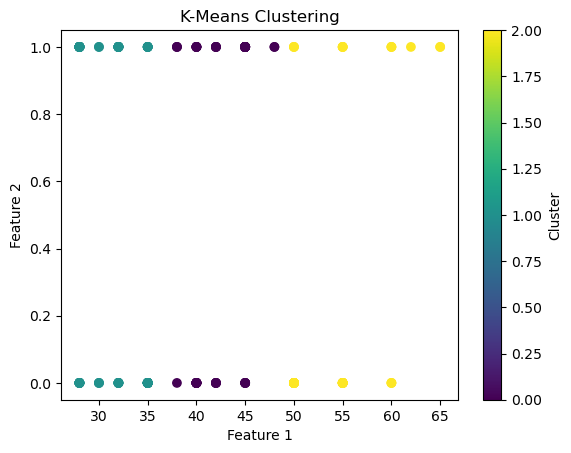

In [16]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Assuming you have X (features) from your preprocessed dataset
# You can choose the number of clusters (k) based on domain knowledge or use other methods
k = 3

# Initialize the KMeans model with the chosen number of clusters
kmeans = KMeans(n_clusters=k, random_state=42)

# Fit the model to your data
kmeans.fit(X)

# Get the cluster labels for each data point
cluster_labels = kmeans.labels_

# Assuming X has only two features for visualization
# Change the index based on your dataset columns
feature1_index = 0
feature2_index = 1

plt.scatter(X.iloc[:, feature1_index], X.iloc[:, feature2_index], c=cluster_labels, cmap='viridis')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('K-Means Clustering')
plt.colorbar(label='Cluster')
plt.show()

